<a href="https://colab.research.google.com/github/Imshubhham/Imshubham/blob/main/Automobile_Analysis_EDA_%26_Horsepower_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Automobile.csv')

In [3]:
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [4]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
df.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

<Axes: xlabel='origin', ylabel='count'>

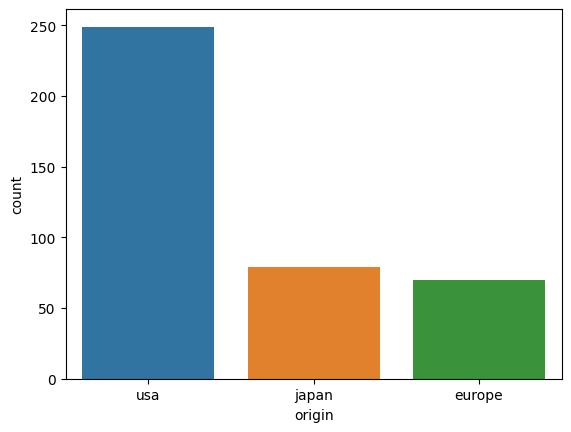

In [7]:
sns.countplot(x = df['origin'])

Text(0.5, 1.0, 'Acceleration vs horsepower')

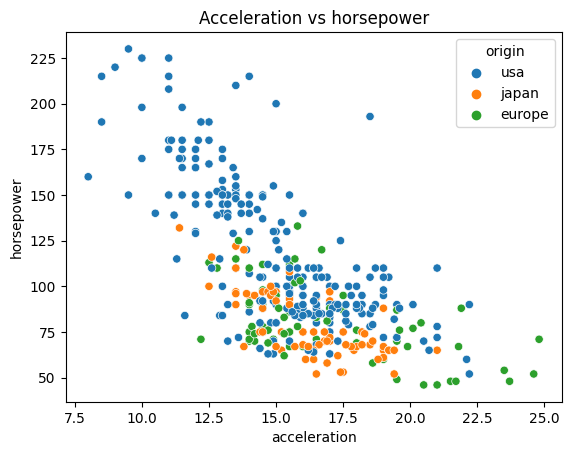

In [14]:
sns.scatterplot(x = 'acceleration', y = 'horsepower', hue = 'origin', data = df)
plt.title('Acceleration vs horsepower')

Text(0.5, 1.0, 'Weight vs displacement')

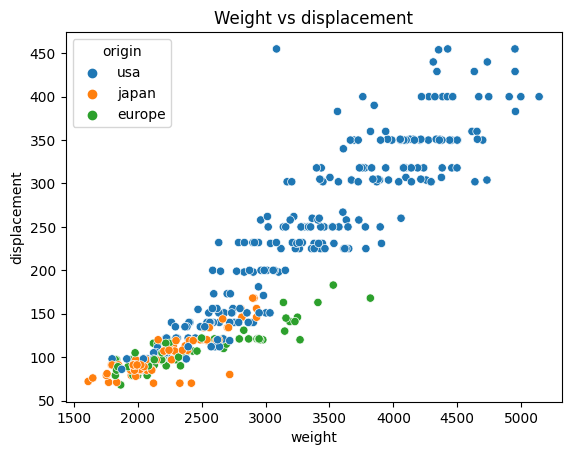

In [15]:
sns.scatterplot(x = 'weight', y = 'displacement', hue = 'origin', data = df)
plt.title('Weight vs displacement')

Text(0.5, 1.0, 'Weight vs acceleration')

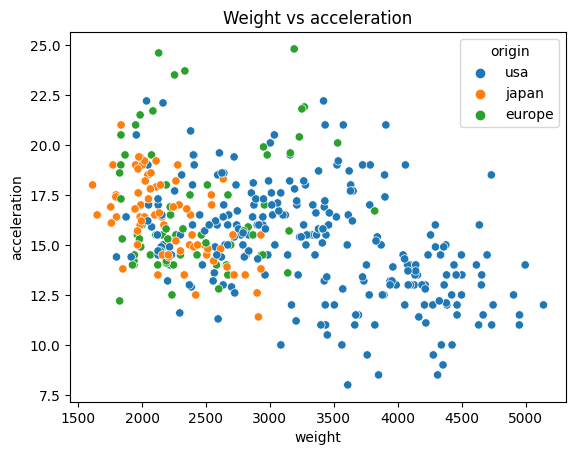

In [16]:
sns.scatterplot(x = 'weight', y = 'acceleration', hue = 'origin', data = df)
plt.title('Weight vs acceleration')

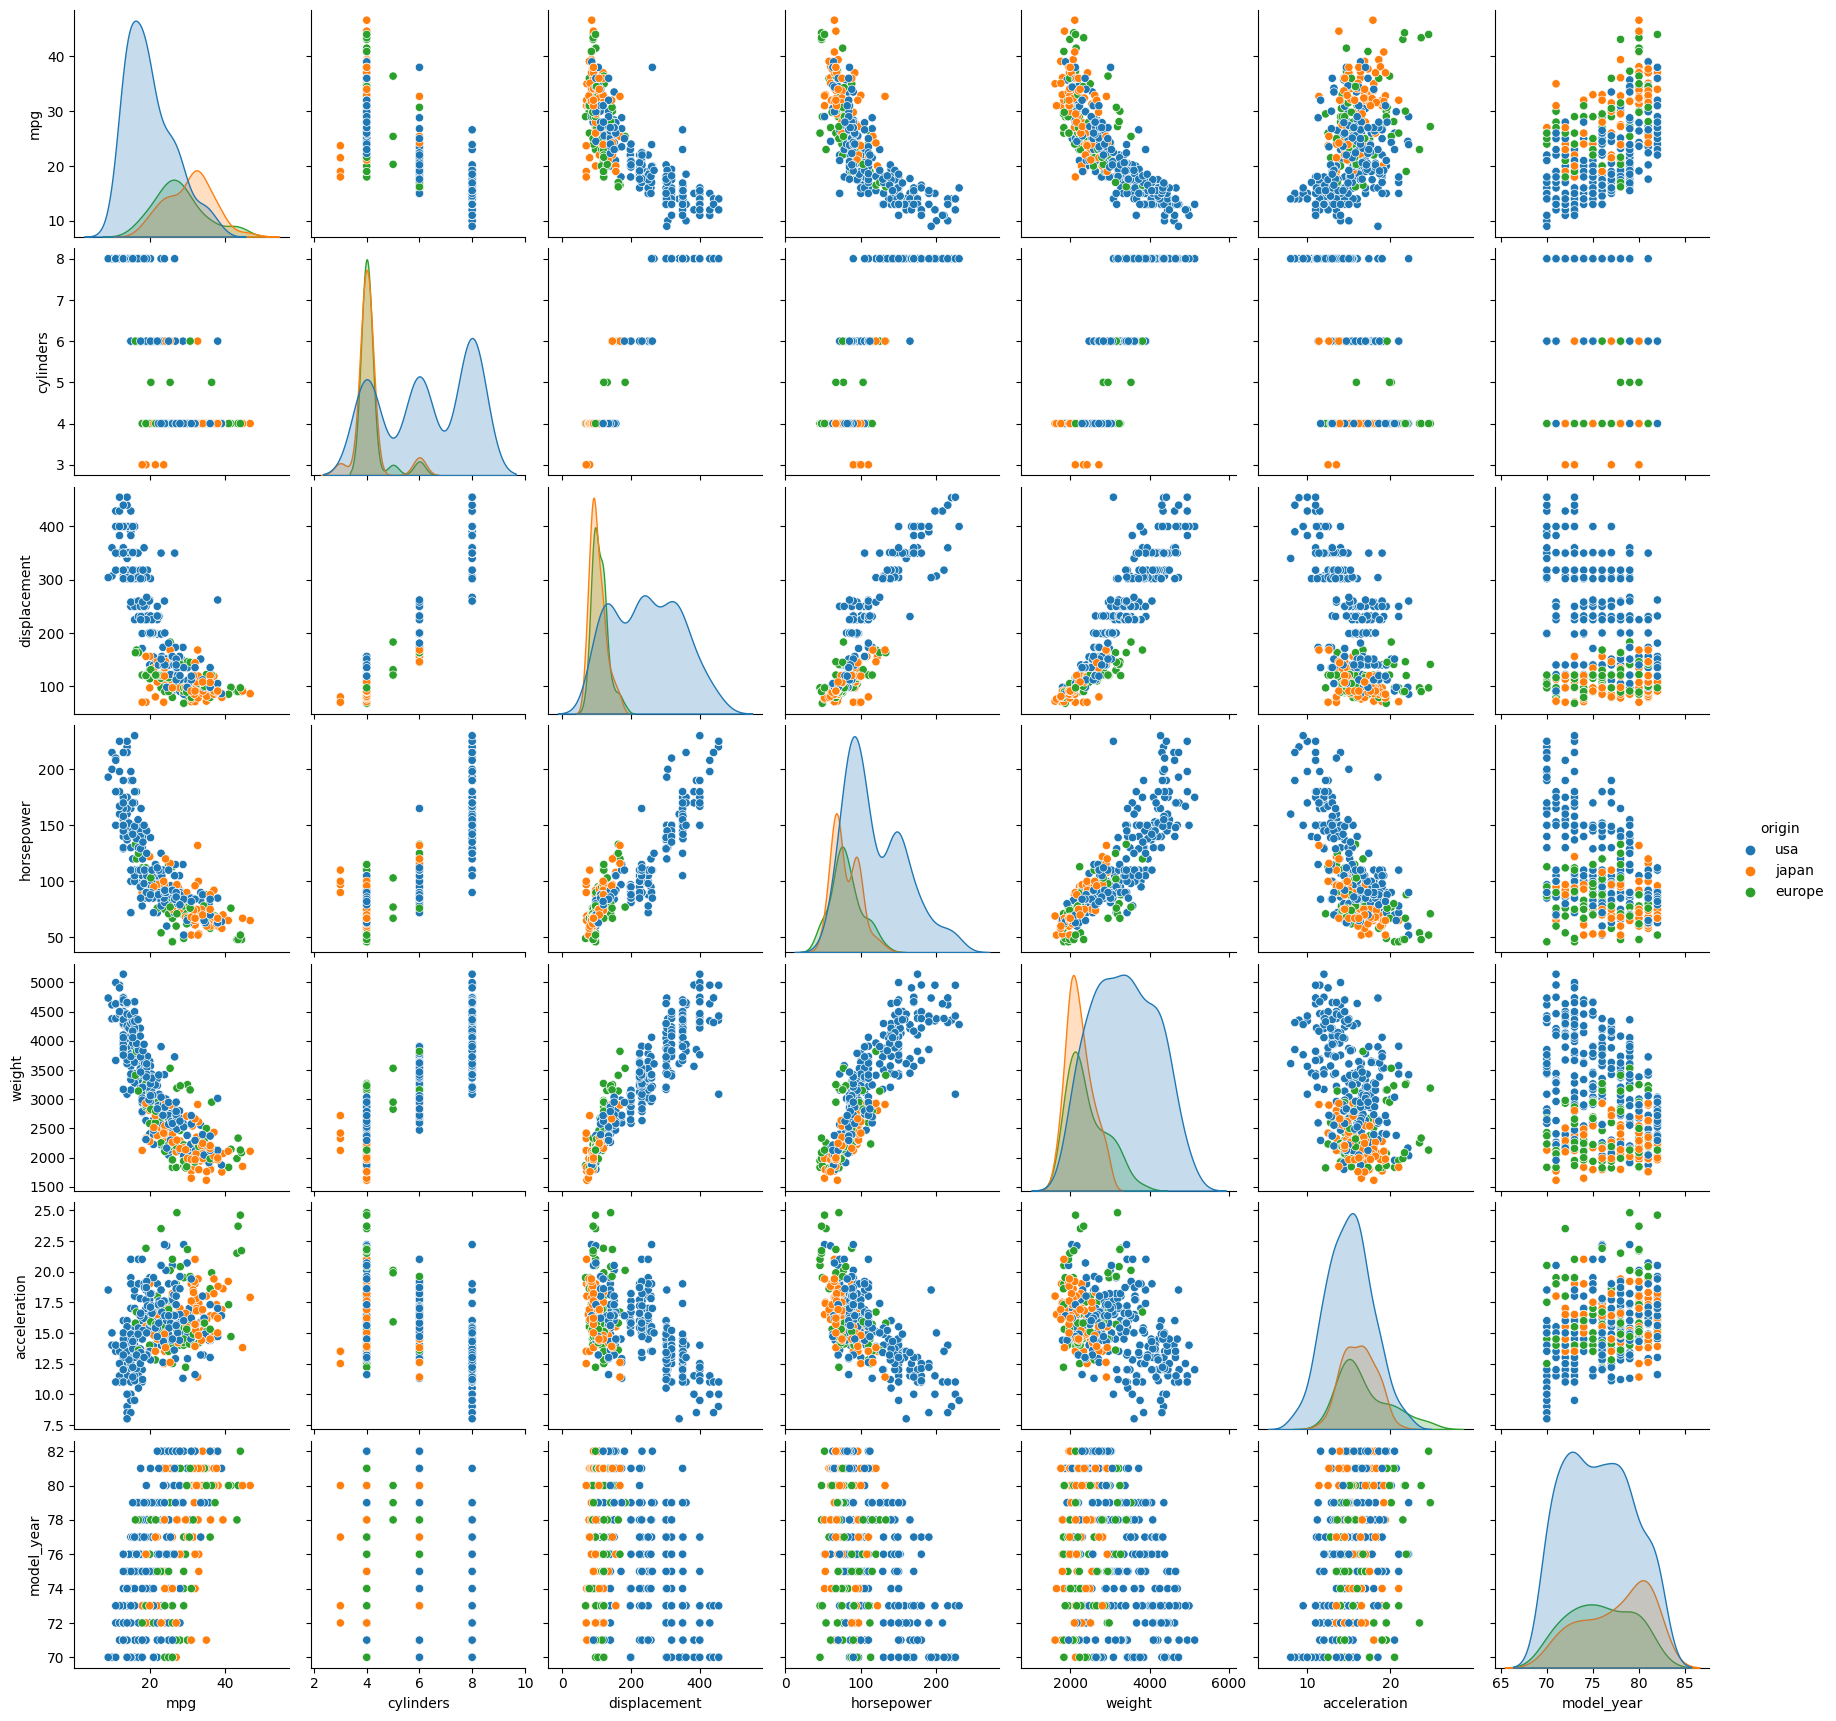

In [18]:
sns.pairplot(df, hue = 'origin')

Text(0.5, 1.0, 'Effect of Cylinders on MPG')

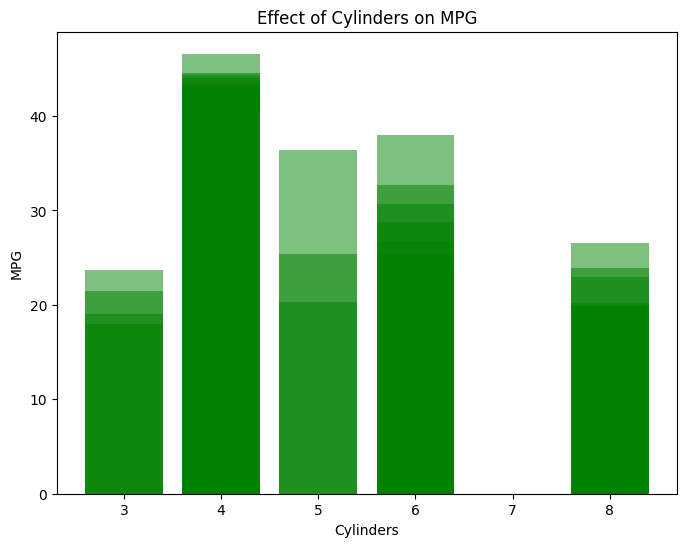

In [24]:
plt.figure(figsize=(8, 6))
plt.bar(df['cylinders'], df['mpg'], color='green', alpha=0.5)
plt.xlabel('Cylinders')
plt.ylabel('MPG')
plt.title('Effect of Cylinders on MPG')

Text(0.5, 1.0, 'Effect of Cylinders on Acceleration')

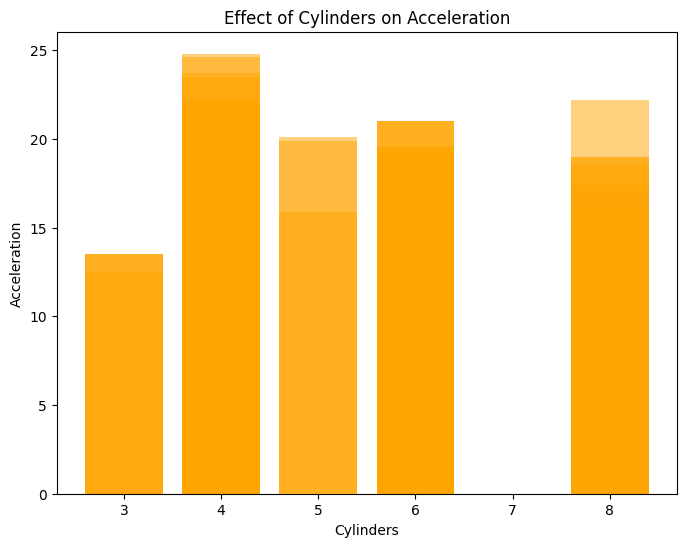

In [26]:
plt.figure(figsize=(8, 6))
plt.bar(df['cylinders'], df['acceleration'], color='orange', alpha=0.5)
plt.xlabel('Cylinders')
plt.ylabel('Acceleration')
plt.title('Effect of Cylinders on Acceleration')

The number of cylinders in a car is one of the factors that can influence acceleration, but it is not the sole determining factor. Generally, cars with more cylinders tend to have higher power outputs, which can lead to improved acceleration.

<Axes: xlabel='origin'>

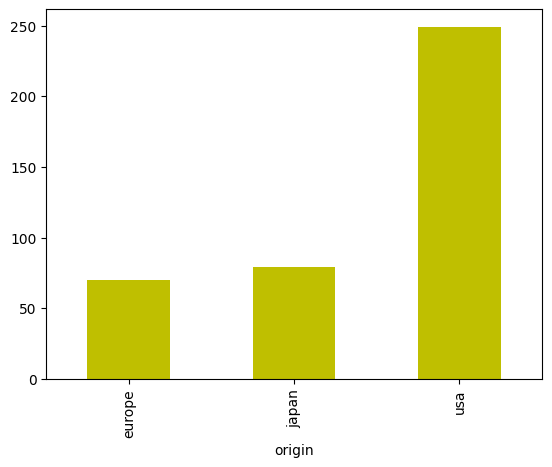

In [28]:
df.groupby('origin')['name'].count().plot.bar(color = 'y')

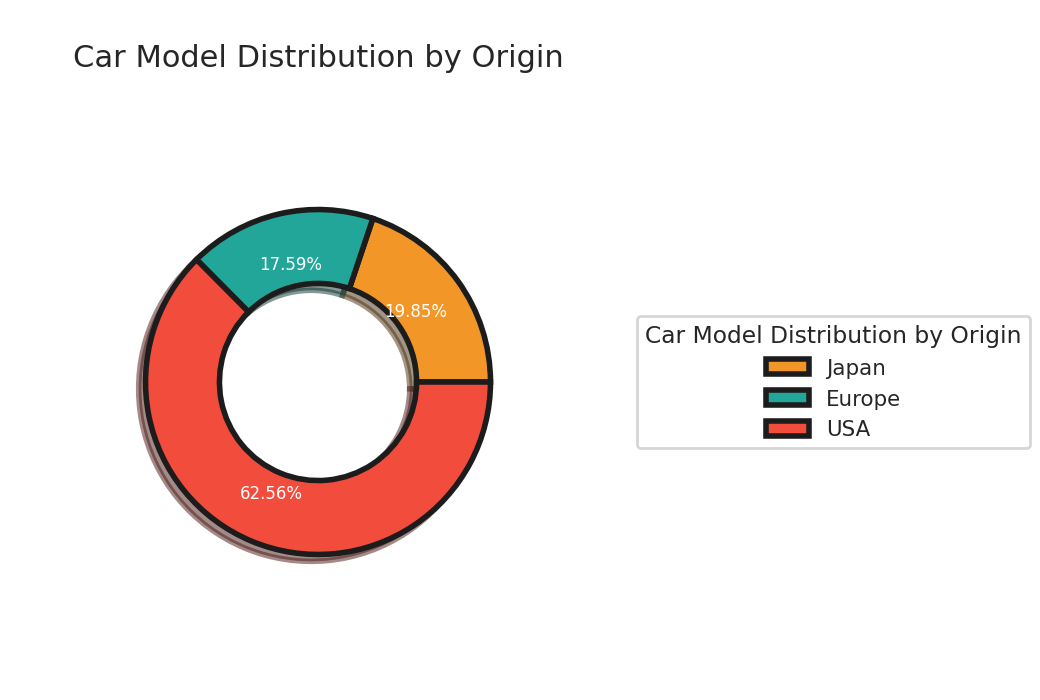

In [32]:
plt.subplots(figsize=(8, 8))
sns.set_style("white")
sns.set_context("poster",font_scale = .7)

palette = ["#F29727","#22A699","#F24C3D","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]
labels = ['Japan', 'Europe', 'USA']
size = 0.3

wedges, texts, autotexts = plt.pie([len(df[df['origin'] == 'japan']),
                                   len(df[df['origin'] == 'europe']),
                                   len(df[df['origin'] == 'usa'])],
                                  textprops=dict(size=12, color='white'),
                                  autopct='%.2f%%',
                                  pctdistance=0.7,
                                  radius=0.7,
                                  colors=palette,
                                  shadow=True,
                                  wedgeprops=dict(width=size, edgecolor='#1c1c1c',
                                                  linewidth=4),
                                  startangle=0)

plt.legend(wedges, labels, title='Car Model Distribution by Origin', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('\nCar Model Distribution by Origin', fontsize=22)
plt.show()

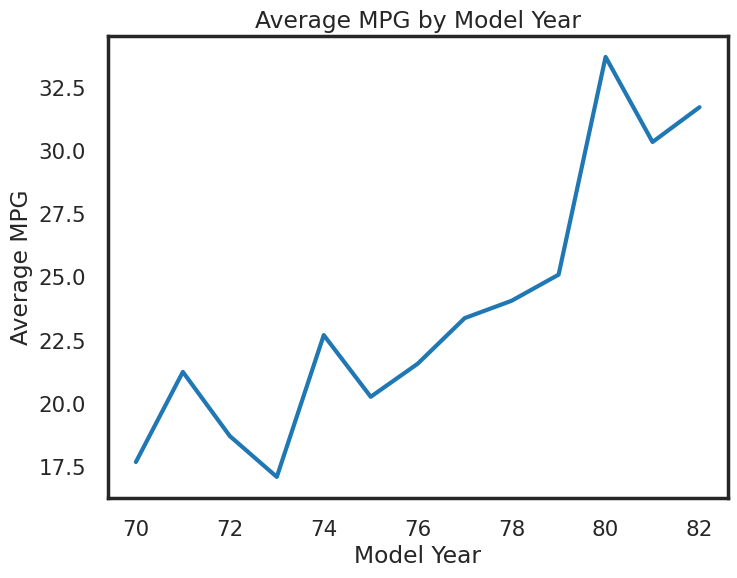

In [33]:
# Calculate the average mpg for each model year
avg_mpg_by_year = df.groupby('model_year')['mpg'].mean()
plt.figure(figsize=(8, 6))
sns.lineplot(data=avg_mpg_by_year)
plt.title('Average MPG by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.show()

# Conclusion from EDA

* The data exhibits some level of imbalance, though not to an extreme extent.
Correlation analysis reveals significant positive/negative correlations between certain features.
* The feature "Acceleration" displays high variability, making it challenging to establish correlations effectively.
* Over the years, there has been a noticeable decline in "Weight" and "Displacement" in vehicles.
* In contrast, both "Acceleration" and "MPG" have shown consistent improvement over the years.
* An intriguing finding !

  Cars with 4 cylinders has high MPG
  
  Cars with 4 cylinders has high Acceleration

In [36]:
X = df.drop(['name','horsepower'], axis =1)
Y = df['horsepower']
X = pd.get_dummies(X, columns=['origin'])

In [52]:
Y.fillna(Y.mean(), inplace = True)

There where 6 Null value, so filled with average value.

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(r2_score(y_test, y_pred)*100)

85.71078064831538


In [56]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(r2_score(y_test, y_pred)*100)

79.43925589748133


In [57]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(r2_score(y_test, y_pred)*100)

90.71743208920563


In [58]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(r2_score(y_test, y_pred)*100)

88.54571340411087


In this Automobile horsepower prediction dataset Random forest performs well.